In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv("C:/Users/sathy/OneDrive/Desktop/Credit_Card_fraud/creditcard.csv")

In [4]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

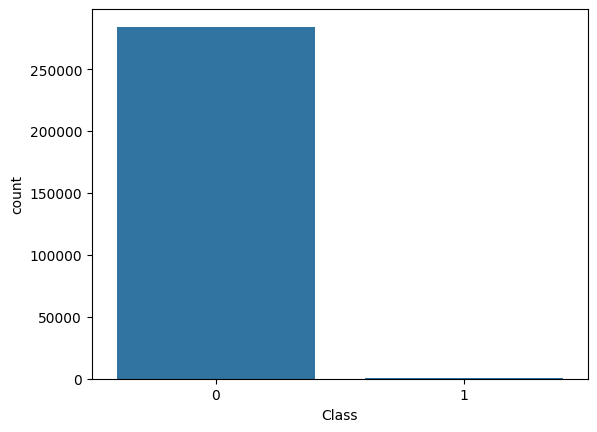

In [7]:
# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.show()

In [8]:
scaler = StandardScaler()
df[['Amount', 'Time',"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11",
    "V12","V13","V14","V15","V16","V17","V18","V19","V20","V21"
    ,"V22","V23","V24","V25","V26","V27","V28"]] = scaler.fit_transform(df[['Amount', 'Time',"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11",
    "V12","V13","V14","V15","V16","V17","V18","V19","V20","V21"
    ,"V22","V23","V24","V25","V26","V27","V28"]])

In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Precision: 0.9998069735202766
Recall: 1.0
        importance
V14       0.191558
V10       0.116805
V12       0.098366
V4        0.097521
V17       0.082545
V11       0.056140
V16       0.054171
V3        0.052691
V2        0.039214
V9        0.027265
V7        0.015989
V8        0.015602
V21       0.015514
V18       0.015196
V19       0.011881
V27       0.011516
V5        0.010615
V1        0.009523
Amount    0.008974
V20       0.007475
V26       0.007363
V13       0.007304
Time      0.006927
V15       0.006663
V28       0.006559
V23       0.006189
V6        0.005690
V25       0.005363
V22       0.004874
V24       0.004510


In [12]:
import joblib

# Save the model and scaler
joblib.dump(model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']